In [459]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [460]:
import datetime as dt
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [461]:
import pandas as pd
import gspread
file_name ="/content/drive/MyDrive/Week2_data/Machine Learning Data Sets/Time series/london_weather_MODIFIED - london_weather_MODIFIED.csv"
df = pd.read_csv(file_name)
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [463]:
df.isna().sum()

date                   0
cloud_cover          403
sunshine             384
global_radiation     402
max_temp             390
mean_temp            419
min_temp             386
precipitation        390
pressure             388
snow_depth          1752
dtype: int64

In [464]:
# Check the data type of the 'date' column
df['date'].dtypes

dtype('int64')

In [465]:
# Convert the 'date' column to strings if necessary
if df['date'].dtypes != 'object':
    df['date'] = df['date'].astype(str)
df['date']

0        19790101
1        19790102
2        19790103
3        19790104
4        19790105
           ...   
15336    20201227
15337    20201228
15338    20201229
15339    20201230
15340    20201231
Name: date, Length: 15341, dtype: object

In [466]:
# Remove leading and trailing whitespace from the strings
df['date'] = df['date'].str.strip()
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [467]:
# Convert the strings to datetime objects
df['datetime'] = pd.to_datetime(df['date'], format='%Y%m%d')
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979-01-01
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979-01-02
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979-01-03
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1979-01-04
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1979-01-05


In [469]:
# Create a datetime index
df.index = (df['date'])
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime
date,,,,,,,,,,,
19790101,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979-01-01
19790102,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979-01-02
19790103,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979-01-03
19790104,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1979-01-04
19790105,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1979-01-05


In [470]:
df = df.drop(columns=['date'])


In [471]:
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime
date,,,,,,,,,,
19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979-01-01
19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979-01-02
19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979-01-03
19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1979-01-04
19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1979-01-05


In [472]:
# Filter data from a certain year
year_to_filter = 2000
filtered_df = df[df['datetime'].dt.year >= year_to_filter]
filtered_df.head()
df = filtered_df
df2 = filtered_df
df3 = filtered_df
df4 = filtered_df

In [473]:
# Columns to keep
columns_to_keep = ['precipitation','mean_temp','min_temp','max_temp','snow_depth']
# Drop columns except the ones specified
columns_to_drop = set(df.columns) - set(columns_to_keep)
columns_to_drop
df = df.drop(columns=columns_to_drop)
df.head()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
20000101,10.8,7.0,4.9,0.0,0.0
20000102,11.5,7.9,5.0,0.2,0.0
20000103,9.5,9.4,7.2,6.0,0.0
20000104,11.0,7.0,4.4,0.2,0.0
20000105,10.8,6.4,1.9,0.8,0.0


In [474]:
df.dtypes

max_temp         float64
mean_temp        float64
min_temp         float64
precipitation    float64
snow_depth       float64
dtype: object

In [475]:
df.isna().sum()

max_temp          390
mean_temp         419
min_temp          386
precipitation     390
snow_depth       1752
dtype: int64

In [476]:
# Define numeric and categorical columns
numeric_columns = df.select_dtypes(include=['float'])
# use simple median imputer to fill the missing values
numeric_imputer = SimpleImputer(strategy='mean')
numeric_imputed = numeric_imputer.fit_transform(numeric_columns)
# Assign imputed values back to the DataFrame
df[numeric_columns.columns] = numeric_imputed
df.head()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
20000101,10.8,7.0,4.9,0.0,0.0
20000102,11.5,7.9,5.0,0.2,0.0
20000103,9.5,9.4,7.2,6.0,0.0
20000104,11.0,7.0,4.4,0.2,0.0
20000105,10.8,6.4,1.9,0.8,0.0


In [477]:
df.isna().sum()

max_temp         0
mean_temp        0
min_temp         0
precipitation    0
snow_depth       0
dtype: int64

In [478]:
df2.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime
date,,,,,,,,,,
20000101,7.0,0.4,18.0,10.8,7.0,4.9,0.0,102450.0,0.0,2000-01-01
20000102,7.0,0.7,20.0,11.5,7.9,5.0,0.2,102530.0,0.0,2000-01-02
20000103,8.0,0.0,13.0,9.5,9.4,7.2,6.0,101860.0,0.0,2000-01-03
20000104,5.0,2.9,34.0,11.0,7.0,4.4,0.2,101480.0,0.0,2000-01-04
20000105,5.0,1.3,25.0,10.8,6.4,1.9,0.8,101420.0,0.0,2000-01-05


In [479]:
# Specify the two-year period
start_year = 2000
end_year = 2010

# Filter the DataFrame for the specified two-year period
filtered_df2 = df2[(df2['datetime'].dt.year >= start_year) & (df2['datetime'].dt.year <= end_year)]

print(filtered_df2)

          cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
date                                                                     
20000101          7.0       0.4              18.0      10.8        7.0   
20000102          7.0       0.7              20.0      11.5        7.9   
20000103          8.0       0.0              13.0       9.5        9.4   
20000104          5.0       2.9              34.0      11.0        7.0   
20000105          5.0       1.3              25.0      10.8        6.4   
...               ...       ...               ...       ...        ...   
20101227          8.0       0.0              12.0       8.0        0.2   
20101228          8.0       0.0              12.0       9.5        5.3   
20101229          8.0       0.0              12.0       7.7        6.8   
20101230          8.0       0.0              12.0       6.8        6.9   
20101231          8.0       0.0              13.0       7.2        5.9   

          min_temp  precipitation  pr

In [480]:
# Getting the month
df2['Month'] = df2['datetime'].dt.month
df2.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime,Month
date,,,,,,,,,,,
20000101,7.0,0.4,18.0,10.8,7.0,4.9,0.0,102450.0,0.0,2000-01-01,1
20000102,7.0,0.7,20.0,11.5,7.9,5.0,0.2,102530.0,0.0,2000-01-02,1
20000103,8.0,0.0,13.0,9.5,9.4,7.2,6.0,101860.0,0.0,2000-01-03,1
20000104,5.0,2.9,34.0,11.0,7.0,4.4,0.2,101480.0,0.0,2000-01-04,1
20000105,5.0,1.3,25.0,10.8,6.4,1.9,0.8,101420.0,0.0,2000-01-05,1


In [481]:
df2.isna().sum()

cloud_cover          389
sunshine             384
global_radiation     389
max_temp             390
mean_temp            419
min_temp             386
precipitation        390
pressure             387
snow_depth          1752
datetime               0
Month                  0
dtype: int64

In [482]:
# Define numeric and categorical columns
numeric_columns = df2.select_dtypes(include=['float'])
# use simple median imputer to fill the missing values
numeric_imputer = SimpleImputer(strategy='mean')
numeric_imputed = numeric_imputer.fit_transform(numeric_columns)
# Assign imputed values back to the DataFrame
df2[numeric_columns.columns] = numeric_imputed
df2.isna().sum()

cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
datetime            0
Month               0
dtype: int64

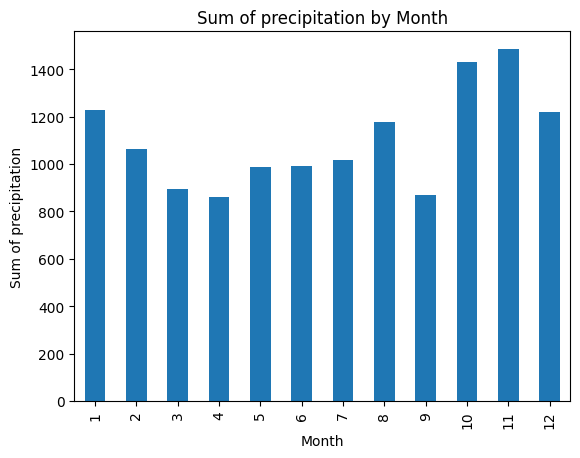

In [483]:
# Group the data by month and sum the values for each month
monthly_data = df2.groupby(df2['datetime'].dt.month)['precipitation'].sum()
# Plot the bar plot
monthly_data.plot(kind='bar', xlabel='Month', ylabel='Sum of precipitation', title='Sum of precipitation by Month')
plt.show()

In [484]:
max_precipitation_row = df2.loc[df2['precipitation'] == df2['precipitation'].max()]
max_precipitation_row

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime,Month
date,,,,,,,,,,,
20150826,6.0,3.4,140.0,19.6,17.0,14.1,51.6,100420.0,0.0,2015-08-26,8


In [485]:
#Find the date and corresponding value for the max precipitation.
max_precipitation_date = max_precipitation_row['datetime'].values[0]
max_precipitation_value = max_precipitation_row['precipitation'].values[0]
print(max_precipitation_date)
print(max_precipitation_value)

2015-08-26T00:00:00.000000000
51.6


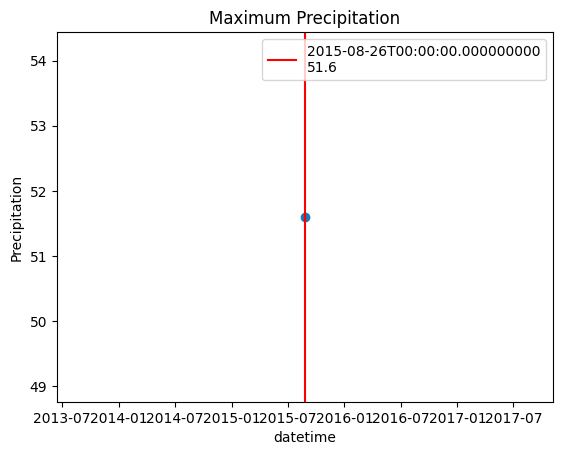

In [486]:
import matplotlib.pyplot as plt

# Extract the date and value from the previously obtained row
max_precipitation_date = max_precipitation_row['datetime'].values[0]
max_precipitation_value = max_precipitation_row['precipitation'].values[0]

# Plot the data point
plt.plot(max_precipitation_date, max_precipitation_value, marker='o')

# Label the axes
plt.xlabel("datetime")
plt.ylabel("Precipitation")
# Add title
plt.title("Maximum Precipitation")
# Add vertical line with label
plt.axvline(x=max_precipitation_date, color='red', label=f'{max_precipitation_date}\n{max_precipitation_value}')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [487]:
# Specify the two-year period
start_year = 2000
end_year = 2020
years = df2[(df2['datetime'].dt.year >= start_year) & (df2['datetime'].dt.year <= end_year)]#list(range(2000, 2021))
years

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime,Month
date,,,,,,,,,,,
20000101,7.0,0.4,18.0,10.8,7.0,4.9,0.0,102450.0,0.000000,2000-01-01,1
20000102,7.0,0.7,20.0,11.5,7.9,5.0,0.2,102530.0,0.000000,2000-01-02,1
20000103,8.0,0.0,13.0,9.5,9.4,7.2,6.0,101860.0,0.000000,2000-01-03,1
20000104,5.0,2.9,34.0,11.0,7.0,4.4,0.2,101480.0,0.000000,2000-01-04,1
20000105,5.0,1.3,25.0,10.8,6.4,1.9,0.8,101420.0,0.000000,2000-01-05,1
...,...,...,...,...,...,...,...,...,...,...,...
20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,0.023146,2020-12-27,12
20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,0.023146,2020-12-28,12
20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,0.023146,2020-12-29,12


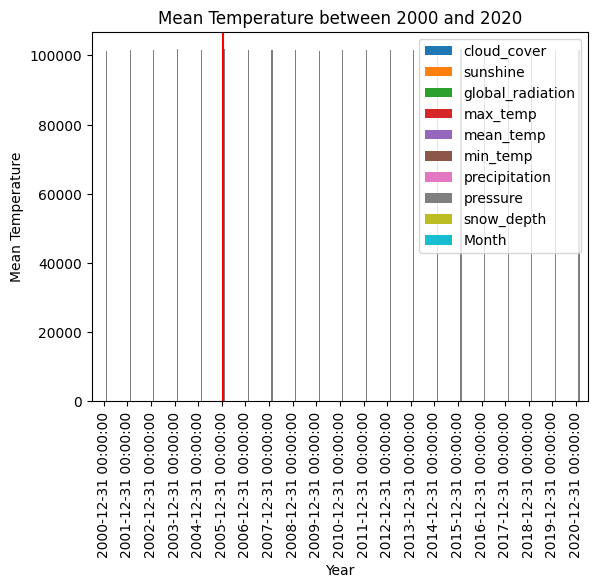

Coolest year: 2014-12-31 00:00:00
Average temperature: cloud_cover              4.023990
sunshine                 4.538548
global_radiation       122.239432
max_temp                16.549672
mean_temp               12.590651
min_temp                 8.586317
precipitation            2.324056
pressure            101269.313805
snow_depth               0.000761
Month                    6.526027
Name: 2014-12-31 00:00:00, dtype: float64


In [489]:
# Set 'date' column as the index
df2.set_index('datetime', inplace=True)
# Extract mean temperature data for years between 2000 and 2020
mean_temp_yearly = df2.resample('Y').mean()
# Plot the mean temperature for each year
mean_temp_yearly.plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Mean Temperature")
plt.title("Mean Temperature between 2000 and 2020")
# Add vertical line with label
plt.axvline(x=mean_temp_yearly.mean().iloc[0], color='red')
# Show the legend
plt.legend()
plt.show()
# Find the year with the coolest average temperature
coolest_year = mean_temp_yearly.mean(axis=1).sort_values().index[0]
# Print the coolest year and its average temperature
print(f"Coolest year: {coolest_year}")
print(f"Average temperature: {mean_temp_yearly.loc[coolest_year]}")